In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re 
import os
from nltk.corpus import stopwords
from nltk.stem  import WordNetLemmatizer
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from os import path, getcwd
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [245]:
data=pd.read_csv("../input/cafe-chatbot-dataset/conversationo.csv")
data.tail()

,Question,answer
974,what is price of French Coffee,"Its our one of best, you can enjoy it at just ..."
975,what is price of Iced Coffee Late,"Its our one of best, you can enjoy it at just ..."
976,what is price of Latte Macchiato,"Its our one of best, you can enjoy it at just ..."
977,what is price of Wainans Choco Coffee,"Its our one of best, you can enjoy it at just ..."
978,book me a table,To book a table you can click on last icon on ...


In [246]:
data.shape

(979, 2)

In [247]:
data.isnull().sum()

Question    18
answer      40
dtype: int64

In [248]:
data=data.dropna()

In [249]:
data.head()

,Question,answer
0,hey,Hello! How may I help you.
1,do u have coffee,"Yes sir Simple Coffee ,Cappuchino, Americano,..."
2,i will take one espresso and 5 americano,Sir thanks for your order. You have ordered 1 ...
3,anything special,"We have coffe,pastries,puff pastries and milks..."
4,suggest something,"We have coffe,pastries,puff pastries and milks..."


# Text Visualization:

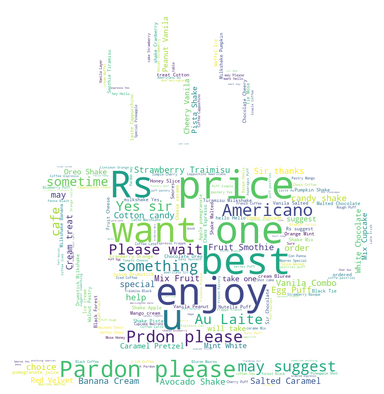

In [250]:
questions=data.to_string()
img=np.array(Image.open("../input/coffee-images/coffee-clipart1.png"))
word=WordCloud(mask=img,background_color="white",max_font_size=100,max_words=10000,random_state=42)
word.generate(questions)
plt.figure(figsize=[10,7])
plt.imshow(word,interpolation="blackman")
plt.axis(False)
plt.show()

# Data Cleaning Process:

In [251]:
data.head()

,Question,answer
0,hey,Hello! How may I help you.
1,do u have coffee,"Yes sir Simple Coffee ,Cappuchino, Americano,..."
2,i will take one espresso and 5 americano,Sir thanks for your order. You have ordered 1 ...
3,anything special,"We have coffe,pastries,puff pastries and milks..."
4,suggest something,"We have coffe,pastries,puff pastries and milks..."


In [252]:
#Loading Stop Words:
stop_w=stopwords.words("english")


In [253]:
def clean(raw_text):
    raw_text=re.sub(r"#\w+"," ",raw_text)
    raw_text=re.sub(r"@\w+"," ",raw_text)
    raw_text=re.sub(r"http\S+"," ",raw_text)
    raw_text=re.sub(r"\d+"," ",raw_text)
    raw_text=re.sub("r<.*?>"," ",raw_text)
    raw_text=raw_text.split()
    raw_text=" ".join([word for word in raw_text if not word in stop_w])
    return raw_text  

In [254]:
data["Question"]=data["Question"].apply(lambda x:clean(x))
data.head()

,Question,answer
0,hey,Hello! How may I help you.
1,u coffee,"Yes sir Simple Coffee ,Cappuchino, Americano,..."
2,take one espresso americano,Sir thanks for your order. You have ordered 1 ...
3,anything special,"We have coffe,pastries,puff pastries and milks..."
4,suggest something,"We have coffe,pastries,puff pastries and milks..."


In [255]:
import string
string.punctuation
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
data["Question"]=[re_punc.sub(" ",w) for w in data["Question"]]
data["Question"]

0                              hey
1                         u coffee
2      take one espresso americano
3                 anything special
4                suggest something
                  ...             
974            price French Coffee
975         price Iced Coffee Late
976          price Latte Macchiato
977     price Wainans Choco Coffee
978                     book table
Name: Question, Length: 937, dtype: object

# Upper case to Lower case:

In [256]:
data["Question"]=data["Question"].apply(lambda x:clean(x))
data.head()

,Question,answer
0,hey,Hello! How may I help you.
1,u coffee,"Yes sir Simple Coffee ,Cappuchino, Americano,..."
2,take one espresso americano,Sir thanks for your order. You have ordered 1 ...
3,anything special,"We have coffe,pastries,puff pastries and milks..."
4,suggest something,"We have coffe,pastries,puff pastries and milks..."


In [257]:
x=np.array(data["Question"])
y=data["answer"]


In [258]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
CounterV=CountVectorizer()
print(CounterV)

CountVectorizer()


In [259]:
x=CounterV.fit_transform(x)
x=x.toarray()

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Training the Data:

In [261]:
Machine=DecisionTreeClassifier()
Machine.fit(x,y)

DecisionTreeClassifier()

# Testing the Machine:

In [262]:
test=["hello"]
test=CounterV.transform(test)
test=test.toarray()
Machine.predict(test)

array(['  Hello! How may I help you.'], dtype=object)

In [263]:
test=["can you suggest something"]
test=CounterV.transform(test)
test=test.toarray()
Machine.predict(test)

array(['I may suggest you Cappuchino'], dtype=object)

In [264]:
print("Accuracy of the model is low with machine leaning but we can increase the accuracy with the help of Deep Learning (ANN and RNN)")
Machine.score(x,y)*100


Accuracy of the model is low with machine leaning but we can increase the accuracy with the help of Deep Learning (ANN and RNN)


67.76947705442903